Nó thì quan trọng để so sánh sự biểu diễn của nhiều thuật toán machine learning phù hợp. Ở phần này bạn sẽ khám phá ra cách tạo một khuôn kiểm thử để so sánh nhiều thuật toán machine learning khác nhau.
- Làm sao để trình bày trải nghiệm khi so sánh trực tiếp các thuật toán machine learning với nhau.
- Làm sao để dùng mẫu đánh giá sự biểu diễn của nhiều thuật toán machine learning trên một bộ dữ liệu.
- Làm báo cáo và minh họa các kết quả sau khi so sánh sự biểu diễn của các thuật toán.

### I. Choose The Best Machine Learning Model

Khi bạn làm việc với một dự án machine learning, bạn thường sẽ kết thúc với nhiều mô hình tốt để từ đó lựa chọn. Mỗi mô hình đều có sự biểu diễn đặc trưng khác nhau. Sử dụng các phương thức resampling như cross validation, từ đó có thể đánh giá độ chính xác của mô hình trên bộ dữ liệu chưa từng được nhìn thấy. Ta cần những đánh giá này để chọn ra 1 đến 2 mô hình tốt nhất.<br>
Sẽ là một ý hay khi bạn minh họa dữ liệu sử dụng các kĩ thuật khác nhau để từ đó có những quan điểm cách nhìn vào các mô hình. Và cuối cùng là chọn 1 đến 2 thuật toán tốt nhất. Một cách để làm là dùng các phương thức minh họa để biểu diễn độ trung bình chính xác, variance, và các xác suất phân phối độ chính xác của mô hình. 

### II. Compare Machine Learning Algorithms Consistently

Mấu chốt ở đây là phải so sánh các thuật toán một cách công bằng để bảo đảm rằng mỗi thuật toán thì được đánh giá cùng một cách và trên cùng một bộ dữ liệu.<br>
Ví dụ bên dưới là bài toán phân loại và chúng ta sẽ dùng 6 thuật toán đã nói trong bài "kiểm thử thuật toán có lựa chọn cho bài toán phân loại".
- Logistic Regression.
- Linear Discriminant Analysis.
- K-Nearest Neighbors.
- Classification and Regression Trees.
- Naive Bayes.
- Support Vector Machines.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv('pima-indians-diabetes.csv', names=names)
array = dataframe.values
X = array[:, :8] # input
Y = array[:,8 ] # output
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
seed = 7
num_folds = 10
# import metrics
from sklearn.model_selection import cross_val_score, KFold
# import algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.699163 (0.061037)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


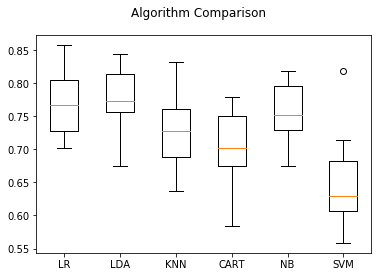

In [5]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

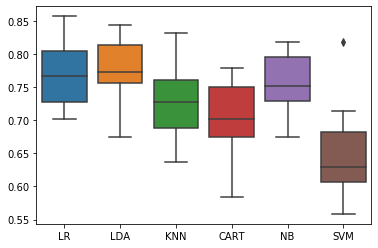

In [7]:
# Another way
ax = sns.boxplot(x=names, y=results)

Theo kết quả này thì logistic regression và linear discriminant
analysis là 2 mô hình giá trị nhất trong bài toán này.